- Reading Dataset from Kaggle

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"basmaelbali","key":"6b611586e714e6b980e5ec521850e79f"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d ibrahimserouis99/one-piece-image-classifier

Dataset URL: https://www.kaggle.com/datasets/ibrahimserouis99/one-piece-image-classifier
License(s): GPL-2.0
100% 2.52G/2.53G [00:19<00:00, 112MB/s] 
100% 2.53G/2.53G [00:19<00:00, 140MB/s]


- Extracting the archives

In [3]:
! unzip one-piece-image-classifier.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/Data/Mihawk/201.png  
  inflating: Data/Data/Mihawk/201.png_inverted.png  
  inflating: Data/Data/Mihawk/202.png  
  inflating: Data/Data/Mihawk/202.png_inverted.png  
  inflating: Data/Data/Mihawk/203.png  
  inflating: Data/Data/Mihawk/203.png_inverted.png  
  inflating: Data/Data/Mihawk/204.png  
  inflating: Data/Data/Mihawk/204.png_inverted.png  
  inflating: Data/Data/Mihawk/205.png  
  inflating: Data/Data/Mihawk/205.png_inverted.png  
  inflating: Data/Data/Mihawk/206.png  
  inflating: Data/Data/Mihawk/206.png_inverted.png  
  inflating: Data/Data/Mihawk/207.png  
  inflating: Data/Data/Mihawk/207.png_inverted.png  
  inflating: Data/Data/Mihawk/208.png  
  inflating: Data/Data/Mihawk/208.png_inverted.png  
  inflating: Data/Data/Mihawk/209.png  
  inflating: Data/Data/Mihawk/209.png_inverted.png  
  inflating: Data/Data/Mihawk/21.png  
  inflating: Data/Data/Mihawk/21.png_inverted.png  
  inflating: Data/Dat

- Importing Libraries

In [4]:
import numpy as np
import glob
import random
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import os

#Import Pytorch
import torch
import torchvision # featuring models, functions and datasets
#Little commonly used shortcut
import torch.nn as nn
#We need the display function from IPython for Jupyter Notebook/Colab
from IPython.display import display
#A package to make beautiful progress bars :)
from tqdm.notebook import tqdm

In [5]:
data = torchvision.datasets.ImageFolder('Data/Data')

- Number of images:

In [ ]:
len(data)

11737

- Number of classes:

In [ ]:
len(data.classes)

18

- the Dataset contains 18 classes/character and each one has a set of images. Let's count the number of images per class:

In [ ]:
class_counts = Counter([label for _, label in data.imgs])
class_counts

Counter({0: 648,
         1: 651,
         2: 657,
         3: 648,
         4: 651,
         5: 651,
         6: 651,
         7: 648,
         8: 651,
         9: 654,
         10: 651,
         11: 665,
         12: 651,
         13: 651,
         14: 651,
         15: 651,
         16: 648,
         17: 659})

In [ ]:
class_dic = {data.classes[i] : count for i,count in class_counts.items()}
class_dic

{'Ace': 648,
 'Akainu': 651,
 'Brook': 657,
 'Chopper': 648,
 'Crocodile': 651,
 'Franky': 651,
 'Jinbei': 651,
 'Kurohige': 648,
 'Law': 651,
 'Luffy': 654,
 'Mihawk': 651,
 'Nami': 665,
 'Rayleigh': 651,
 'Robin': 651,
 'Sanji': 651,
 'Shanks': 651,
 'Usopp': 648,
 'Zoro': 659}

- Visualizing some samples :

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


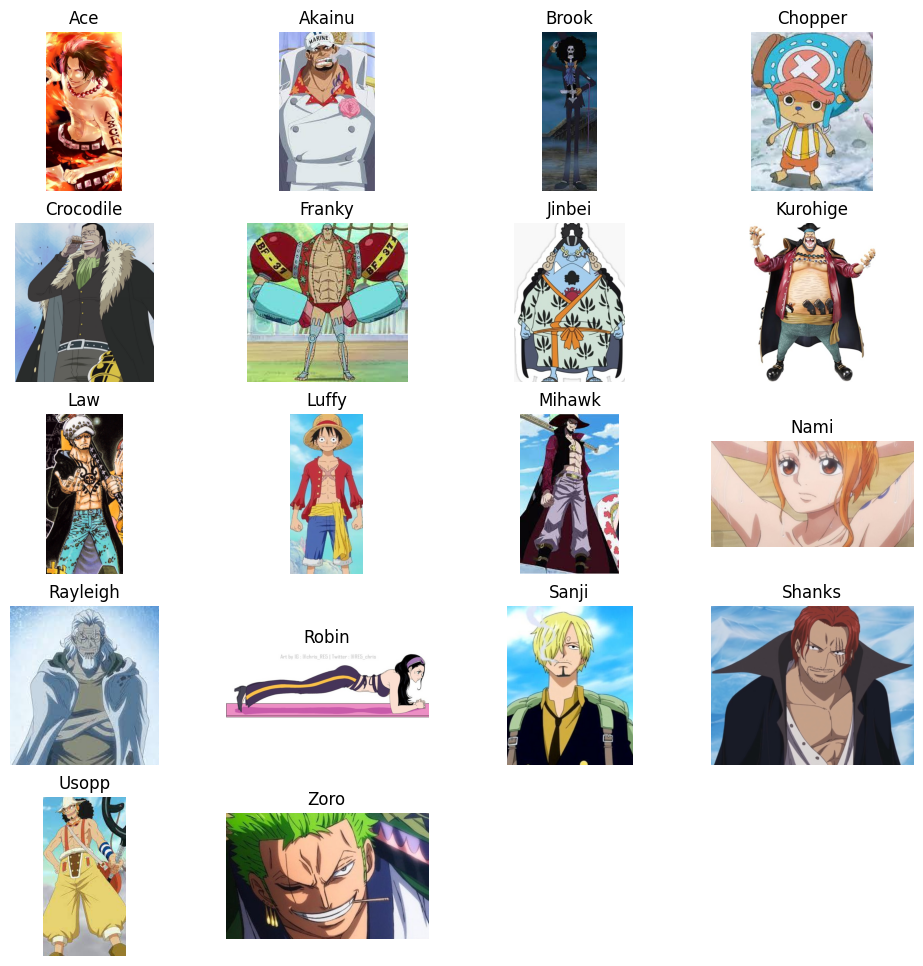

In [ ]:
# Create the figure
figure = plt.figure(figsize=(12, 12))

# Setup the parameters
columns = 4
rows = int(len(data.classes) / columns + 1)
count = 1  # Start counting subplots from 1
plotted_classes = []

# Loop through the dataset
for i, (img, label) in enumerate(data):
    if count > columns * rows:
        break  # Stop the loop if we have enough images
    if label not in plotted_classes:
      ax = plt.subplot(rows, columns, count)
      plt.title(data.classes[label])  # Show class name as title
      plt.axis("off")
      plt.imshow(img)
      count += 1
      plotted_classes.append(label)

plt.show()

- Choosing a torchvision  model

In [ ]:
all_models =torchvision.models.list_models()
all_models

['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [21]:
model = torchvision.models.resnet18()
print(model)
#modifying the last layer since we have a class of 18 elements
model.fc = nn.Linear(in_features=512, out_features=18, bias=True)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- Resizing images and applying data Augmentation

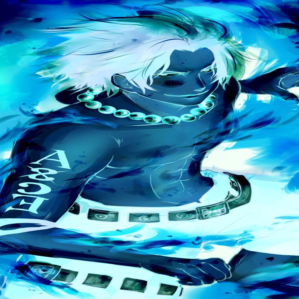

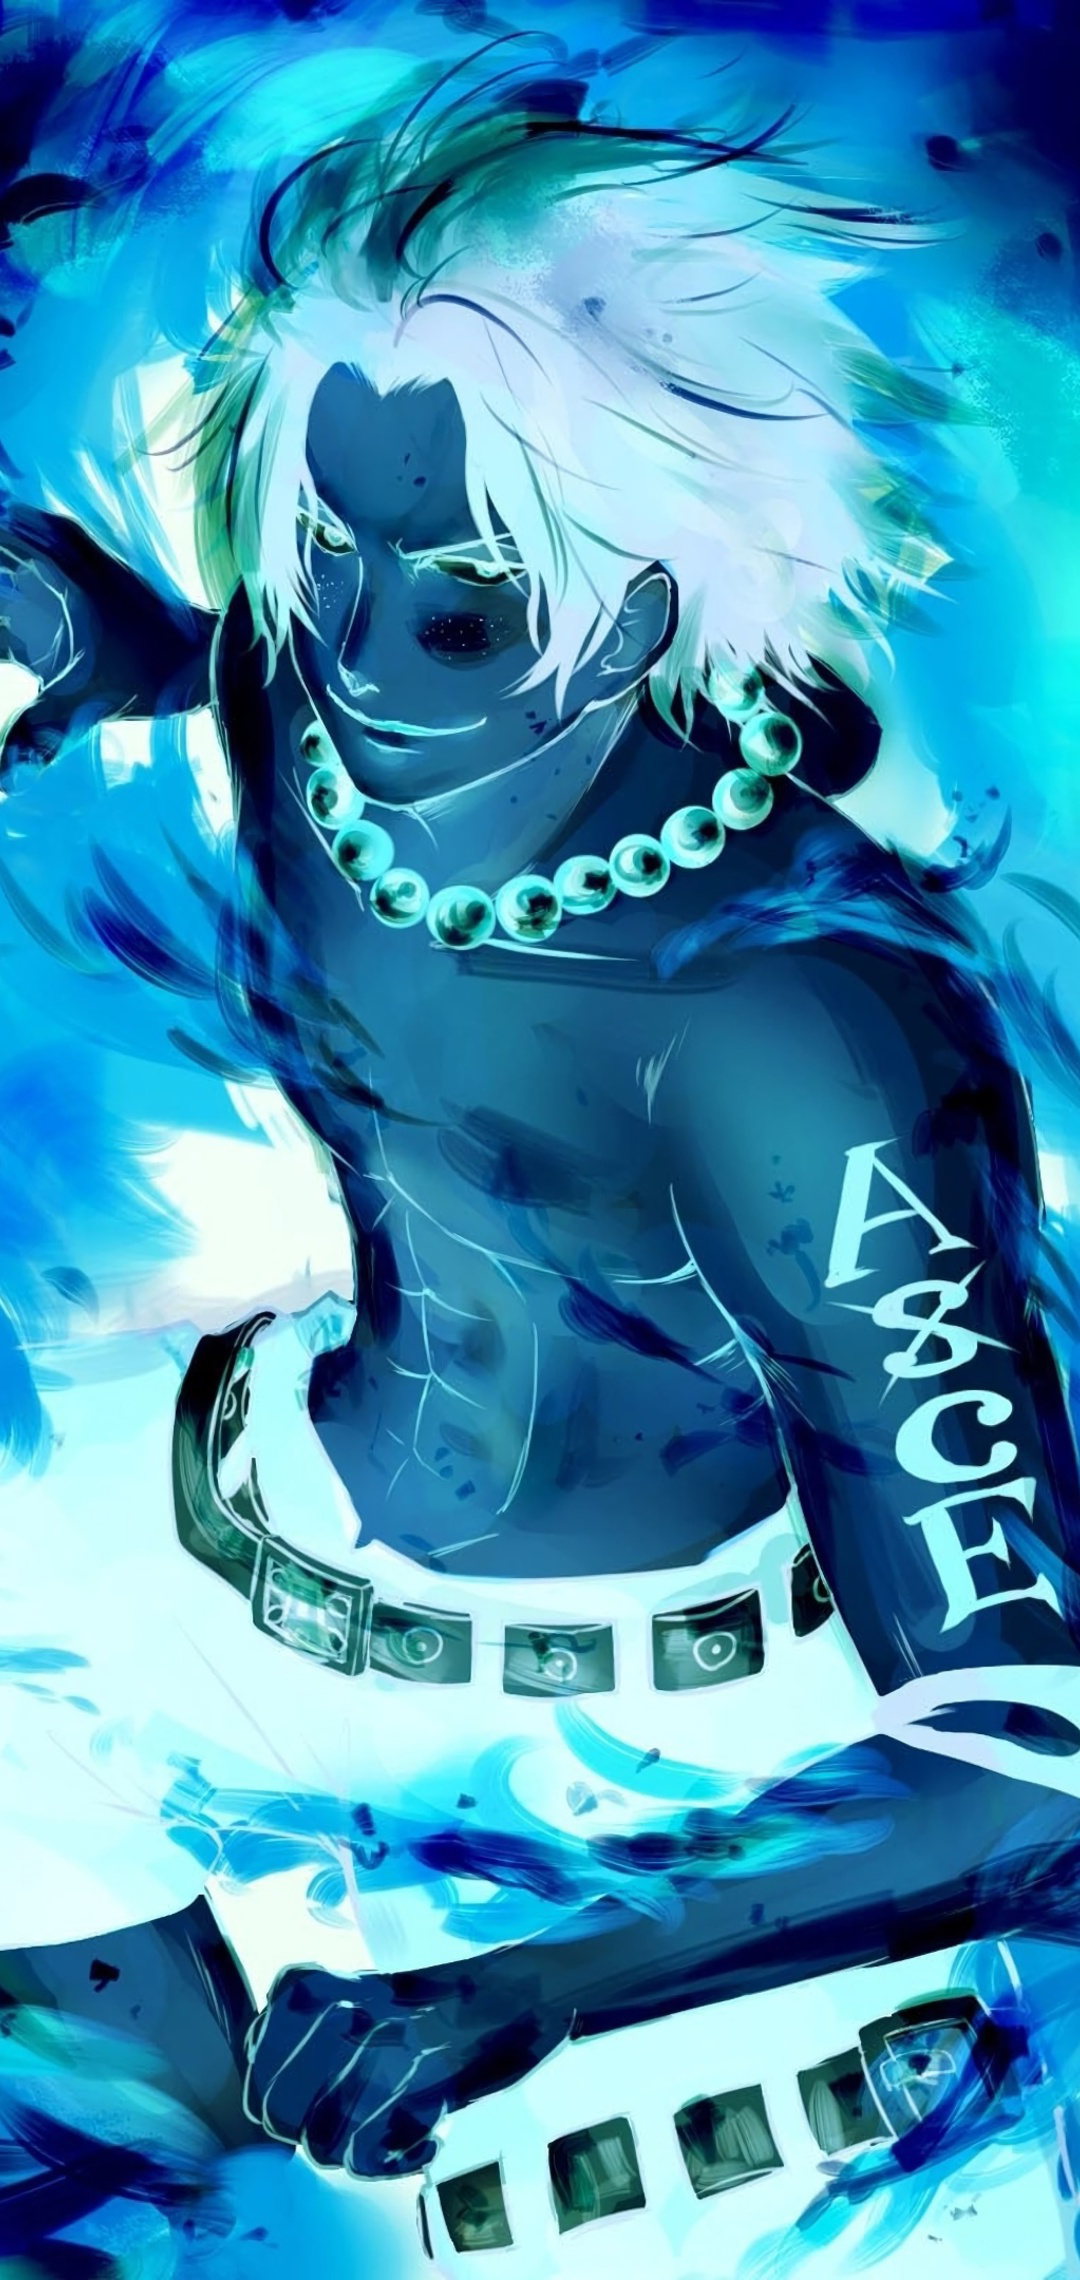

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
#Testing different things
convert = torchvision.transforms.Compose([
    torchvision.transforms.Resize((299,299)),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    #torchvision.transforms.RandomRotation(degrees=(-10,10)),
    #torchvision.transforms.ToTensor(),
     #torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),

])
out = convert(data[1][0].convert('RGB'))
plt.figure()
display(out)
plt.figure()
display(data[1][0].convert('RGB'))

In [9]:
from torchvision import transforms
from PIL import Image

class ConvertPaletteToRGBA:
    def __call__(self, img):
        """
        Convert a PIL Image from Palette mode to RGBA mode if necessary.

        Args:
            img (PIL.Image): The input image.

        Returns:
            PIL.Image: The converted image.
        """
        if img.mode == 'P':
            img = img.convert('RGBA')
        return img

In [10]:
convert = torchvision.transforms.Compose([
    ConvertPaletteToRGBA(),  # Convert Palette images with transparency to RGBA
    torchvision.transforms.Resize((299,299)),
    torchvision.transforms.RandomHorizontalFlip(p=0.5),
    torchvision.transforms.ToTensor(),
    #torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
new_ds = torchvision.datasets.ImageFolder('Data/Data', transform=convert)

- Splitting Dataset

In [11]:
## Percentage of validation data
validation_split = 0.2
N_val_samples = round(validation_split * len(new_ds))

## Split into two Subset
train_set, inter_set = torch.utils.data.random_split(new_ds, [len(new_ds) - N_val_samples, N_val_samples]) #split dataset
val_set, test_set = torch.utils.data.random_split(inter_set, [len(inter_set) - round(N_val_samples/2), round(N_val_samples/2)])
# train and val are Subset objects
print(train_set)
print(val_set)
print(test_set)

- DataLoaders

In [12]:
train_dl= torch.utils.data.DataLoader(train_set, batch_size= 32, shuffle=True, num_workers=4)
val_dl= torch.utils.data.DataLoader(val_set, batch_size=  32 , shuffle=True, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


- Training and Validation Loop

In [13]:
LEARNING_RATE = 0.001

## Move model to the GPU
model = model.cuda()

# Negative log likelihood loss NLLoss()
criterion = nn.CrossEntropyLoss()

# Stochastic Gradient Descent
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

- Testing before the loop :

In [15]:
x, label = train_set[0]
y = model(x.unsqueeze(0).cuda())
print(y.max(1)[1])
print(label)
print(y.max(1)[1] == label)


tensor([4], device='cuda:0')
14
tensor([False], device='cuda:0')


In [34]:

N_EPOCHS = 10
epoch_loss, epoch_acc, epoch_val_loss, epoch_val_acc = [], [], [], []

for e in range(N_EPOCHS):
  running_loss = 0
  running_accuracy = 0

  ## Put the network in training model
  model.train()
  for i, batch in enumerate(tqdm(train_dl)):

    # Get a batch from the dataloader
    x = batch[0]
    labels = batch[1]

    # move the batch to GPU
    x = x.cuda()
    labels = labels.cuda()

    # Compute the network output
    y = model(x)

    # Compute the loss
    loss = criterion(y, labels)
    # Reset the gradients
    optimizer.zero_grad()

    # Compute the gradients
    loss.backward()

    # Apply one step of the descent algorithm to update the weights
    optimizer.step()

    with torch.no_grad():
      running_loss += loss.item()
      running_accuracy += (y.max(1)[1] == labels).sum().item()
  print("Training accuracy:", running_accuracy/float(len(train_set)),
        "Training loss:", running_loss/float(len(train_set)))

  epoch_loss.append(running_loss/len(train_set))
  epoch_acc.append(running_accuracy/len(train_set))

  ### VALIDATION LOOP
  ## Put the network in validation mode
  model.eval()

  running_val_loss = 0
  running_val_accuracy = 0

  for i, batch in enumerate(tqdm(val_dl)):

    with torch.no_grad():
      # Get a batch from the dataloader
      x = batch[0]
      labels = batch[1]

      # move the batch to GPU
      x = x.cuda()
      labels = labels.cuda()

      # Compute the network output
      y = model(x)
      # Compute the loss
      loss = criterion(y, labels)

      running_val_loss += loss.item()
      running_val_accuracy += (y.max(1)[1] == labels).sum().item()

  print("Validation accuracy:", running_val_accuracy/float(len(val_set)),
        "Validation loss:", running_val_loss/float(len(val_set)))

  epoch_val_loss.append(running_val_loss/len(val_set))
  epoch_val_acc.append(running_val_accuracy/len(val_set))

  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.war

Training accuracy: 0.5403620873269436 Training loss: 0.04793227980819881


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.4774083546462063 Validation loss: 0.05733483709642649


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.600212992545261 Training loss: 0.04186552232319808


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.5788576300085252 Validation loss: 0.044176570543954234


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.6317358892438765 Training loss: 0.037922193390873674


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.6717817561807332 Validation loss: 0.036253205803044315


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.6814696485623003 Training loss: 0.033190472628742744


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.6683716965046889 Validation loss: 0.03529471031946701


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.710223642172524 Training loss: 0.029923693529460123


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7033248081841432 Validation loss: 0.031159935628666598


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.7376996805111821 Training loss: 0.02667988153120961


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7041773231031543 Validation loss: 0.03101193848981475


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.7635782747603834 Training loss: 0.023765490123956474


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7306052855924978 Validation loss: 0.028171559606773266


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.7864749733759319 Training loss: 0.021446416734125666


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7058823529411765 Validation loss: 0.03191782329596725


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.8122470713525026 Training loss: 0.018758894866520857


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7570332480818415 Validation loss: 0.02724019127428684


  0%|          | 0/294 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training accuracy: 0.8334398296059637 Training loss: 0.01678666268277981


  0%|          | 0/37 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation accuracy: 0.7391304347826086 Validation loss: 0.027494794623219652


- Vizualizing loss and accuracy

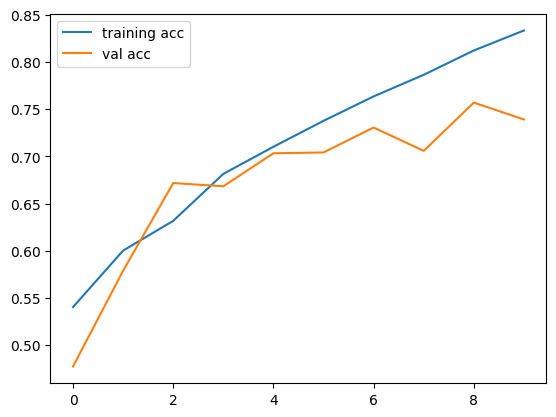

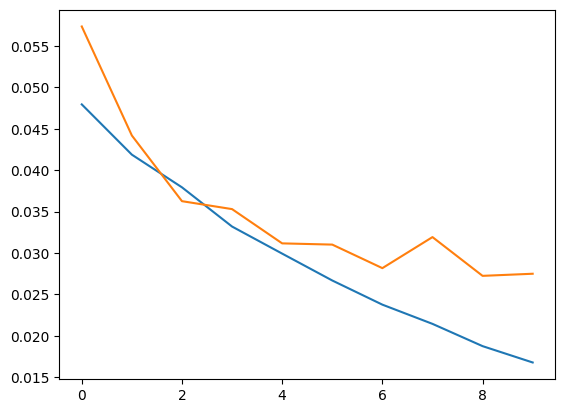

In [35]:
import matplotlib.pyplot as plt
import numpy as np

### YOUR CODE
plt.figure()
x = np.arange(N_EPOCHS)
plt.plot(x, epoch_acc, x, epoch_val_acc)
plt.legend(['training acc', 'val acc'])
plt.show()
plt.figure()
plt.plot(x, epoch_loss, x, epoch_val_loss)

- Testing Loop

In [42]:
from tqdm.notebook import tqdm_notebook

test_dl = torch.utils.data.DataLoader(test_set, batch_size= 64, shuffle=True, num_workers=4)

model.eval()

running_test_loss = 0
running_test_accuracy = 0

epoch_test_loss = []
epoch_test_acc = []

for i, batch in enumerate(tqdm_notebook(test_dl, desc=" Testing Batches")):

  with torch.no_grad():
    x = batch[0]
    label = batch[1]

    x = x.cuda()
    label = label.cuda()

    y = model(x)
    loss = criterion(y, label)

    running_test_loss += loss.item()
    running_test_accuracy += (y.max(1)[1] == label).sum().item()

print("test accuracy:", running_test_accuracy/float(len(test_set)),
        "test loss:", running_test_loss/float(len(test_set)))

epoch_test_loss.append(running_test_loss/len(test_set))
epoch_test_acc.append(running_test_accuracy/len(test_set))

 Testing Batches:   0%|          | 0/19 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


test accuracy: 0.7325383304940375 test loss: 0.013895950995677578


- Visualizing the results of some predictions:

In [18]:
import matplotlib.pyplot as plt
import torch

def plot_predictions(images, labels, predictions):
    """
    Plot a batch of images with their predicted and true labels.

    Args:
        images (torch.Tensor): The batch of images from the DataLoader.
        labels (torch.Tensor): The true labels for the images.
        predictions (torch.Tensor): The predicted labels for the images.
    """
    plt.figure(figsize=(12, 10))
    for i, image in enumerate(images):
        plt.subplot(8, 8, i+1)  # Adjust the grid size depending on batch size
        plt.imshow(image.permute(1, 2, 0).cpu().numpy())  # Convert from (C, H, W) to (H, W, C)
        plt.title(f"Pred: {predictions[i]}, True: {labels[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


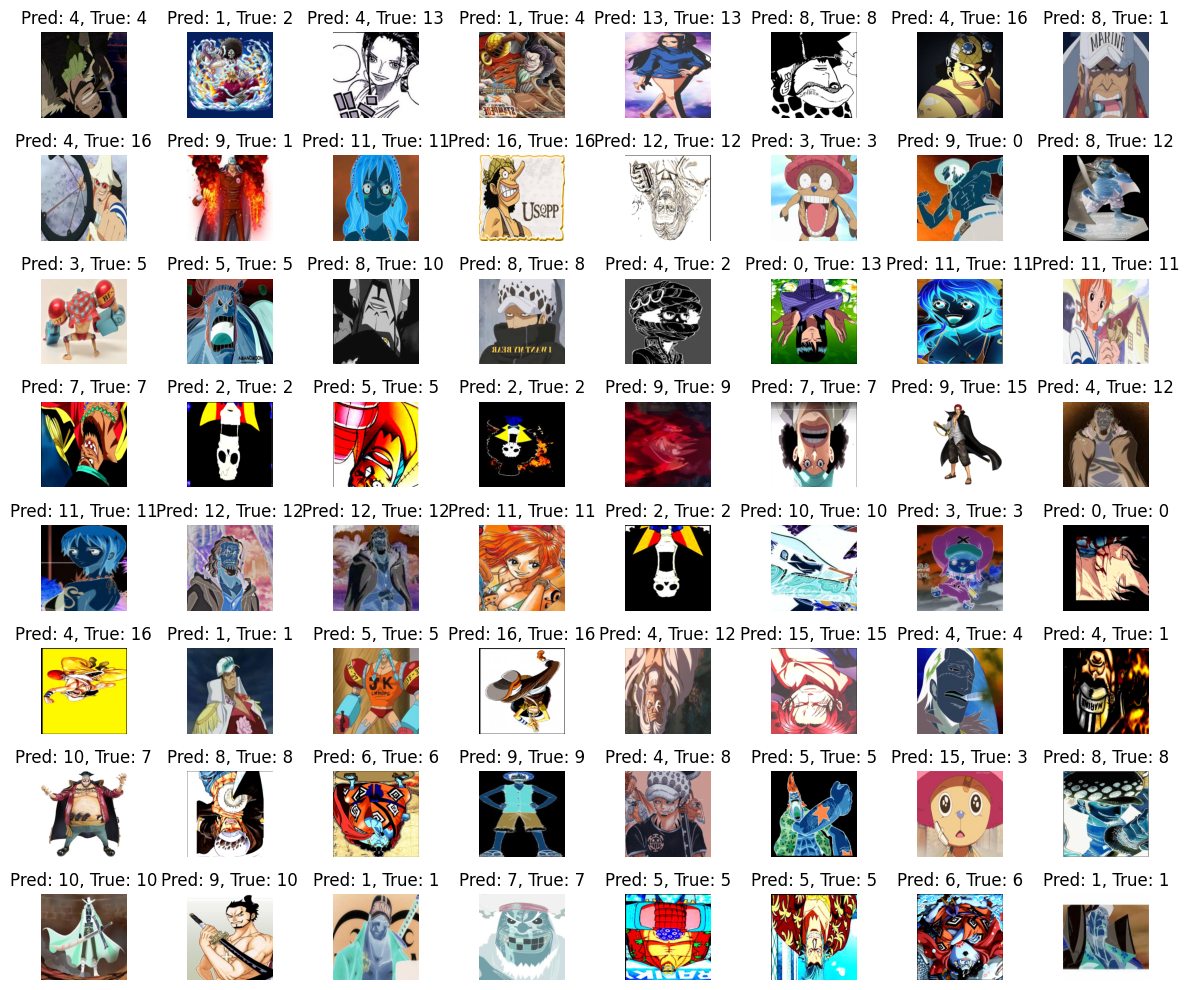

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
for i, batch in enumerate(test_dl):
        if i == 0:
          with torch.no_grad():
              x = batch[0]
              label = batch[1]

              x = x.cuda()
              label = label.cuda()

              y = model(x)

              plot_predictions(x, label, y.max(1)[1])